In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_data=pd.read_csv("train_data_v2.csv")
test_data=pd.read_csv("test_data_v2.csv")

In [ ]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [ ]:
test_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  Month_SeasonalPurchase           6541 non-null   object 
 11  OS                               6537 non-null   float64
 12  SearchEngine        

In [ ]:
for i in train_data.select_dtypes(exclude='number').columns:
    print(i, 'unique data: ', train_data[i].unique())

Month_SeasonalPurchase unique data:  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' nan]
CustomerType unique data:  ['Returning_Visitor' 'New_Visitor' 'Other' nan]
Gender unique data:  ['Not Specified' 'Female' 'Male' nan]
Cookies Setting unique data:  ['Deny' 'ALL' 'Required' nan]
Education unique data:  ['Not Specified' 'Others' 'Diploma' 'Graduate' nan]
Marital Status unique data:  ['Other' 'Married' 'Single' nan]
Made_Purchase unique data:  [False  True]


In [ ]:
for i in test_data.select_dtypes(exclude='number').columns:
    print(i, 'unique data: ', test_data[i].unique())

Month_SeasonalPurchase unique data:  ['Feb' 'Mar' 'May' 'June' 'Oct' 'Nov' 'Sep' 'Aug' 'Jul' 'Dec' nan]
CustomerType unique data:  ['Returning_Visitor' 'New_Visitor' 'Other' nan]
Gender unique data:  ['Not Specified' 'Female' 'Male' nan]
Cookies Setting unique data:  ['Deny' 'ALL' 'Required' nan]
Education unique data:  ['Not Specified' 'Graduate' 'Diploma' 'Others' nan]
Marital Status unique data:  ['Single' 'Married' 'Other' nan]


array([[<Axes: title={'center': 'HomePage'}>,
        <Axes: title={'center': 'HomePage_Duration'}>,
        <Axes: title={'center': 'LandingPage'}>],
       [<Axes: title={'center': 'LandingPage_Duration'}>,
        <Axes: title={'center': 'ProductDescriptionPage'}>,
        <Axes: title={'center': 'ProductDescriptionPage_Duration'}>],
       [<Axes: title={'center': 'GoogleMetric:Bounce Rates'}>,
        <Axes: title={'center': 'GoogleMetric:Exit Rates'}>,
        <Axes: title={'center': 'GoogleMetric:Page Values'}>]],
      dtype=object)

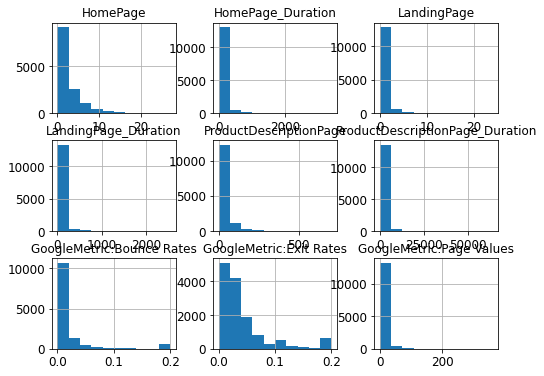

In [ ]:
train_data.hist()

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric:Page Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
train_data.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [ ]:
train_data['Zone']

0        9.0
1        2.0
2        1.0
3        3.0
4        1.0
        ... 
14726    6.0
14727    2.0
14728    4.0
14729    4.0
14730    3.0
Name: Zone, Length: 14731, dtype: float64

<Axes: >

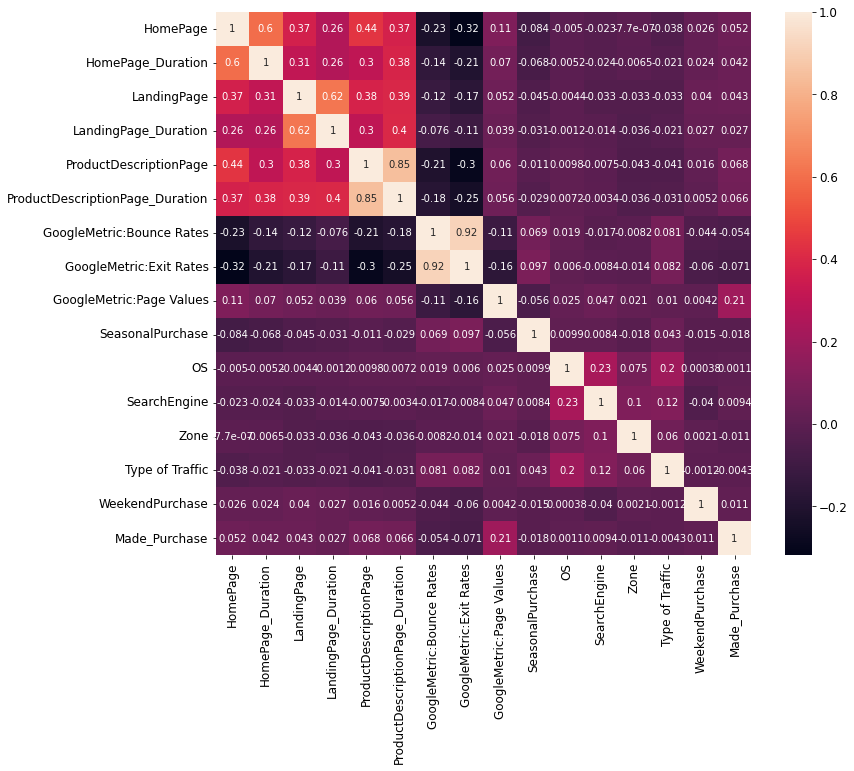

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(),annot=True)

In [ ]:
train_data.drop(columns=['SeasonalPurchase','OS','SearchEngine','WeekendPurchase','Marital Status','Zone','Type of Traffic'],inplace=True)

In [ ]:
test_data.drop(columns=['SeasonalPurchase','OS','SearchEngine','WeekendPurchase','Marital Status','Zone','Type of Traffic'],inplace=True)

In [ ]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,6548.0,2.283293,3.345387,0.0,0.000000,1.000000,4.000000,26.000000
HomePage_Duration,6544.0,76.994609,168.679695,0.0,0.000000,4.875000,91.000000,3398.750000
LandingPage,6543.0,0.494727,1.272524,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,6524.0,32.907760,134.683314,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,6541.0,30.742088,43.539549,0.0,7.000000,17.000000,37.000000,705.000000
ProductDescriptionPage_Duration,6536.0,1151.231143,1917.250309,0.0,172.127778,570.341614,1425.750000,63973.522230
GoogleMetric:Bounce Rates,6533.0,0.022392,0.048374,0.0,0.000000,0.003165,0.017778,0.200000
GoogleMetric:Exit Rates,6548.0,0.043874,0.048290,0.0,0.014543,0.026458,0.050000,0.200000
GoogleMetric:Page Values,6554.0,4.982108,17.635847,0.0,0.000000,0.000000,0.000000,361.763742


In [ ]:
train_data[train_data.duplicated()]

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Made_Purchase
59,0.0,0.0,0.0,0.0,1.0,0.00,0.200000,0.200000,0.0,Feb,Returning_Visitor,Not Specified,Deny,Not Specified,False
84,0.0,0.0,0.0,0.0,1.0,0.00,0.200000,0.200000,0.0,Feb,Returning_Visitor,Female,Deny,Others,False
100,0.0,0.0,0.0,0.0,1.0,0.00,0.200000,0.200000,0.0,Feb,Returning_Visitor,Female,Required,Others,False
283,0.0,0.0,0.0,0.0,1.0,0.00,0.200000,0.200000,0.0,Mar,Returning_Visitor,Female,Required,Graduate,False
308,0.0,0.0,0.0,0.0,1.0,0.00,0.200000,0.200000,0.0,Mar,Returning_Visitor,Female,Required,Graduate,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,0.0,0.0,0.0,0.0,5.0,63.00,0.000000,0.040000,0.0,Feb,Returning_Visitor,Female,ALL,Others,True
14671,0.0,0.0,0.0,0.0,1.0,0.00,0.200000,0.200000,0.0,Dec,Returning_Visitor,Not Specified,Deny,Graduate,True
14675,0.0,0.0,0.0,0.0,14.0,684.75,0.000000,0.014286,0.0,Nov,Returning_Visitor,Not Specified,ALL,Graduate,True
14704,0.0,0.0,0.0,0.0,4.0,44.00,0.000000,0.050000,0.0,May,New_Visitor,Not Specified,ALL,Diploma,True


In [ ]:
train_data_copy=train_data.copy()
test_data_copy=test_data.copy()

In [ ]:
train_data.drop_duplicates(inplace=True)

In [ ]:
cat_cols=train_data.select_dtypes(exclude='number')
num_cols=train_data.select_dtypes(include='number')

In [ ]:
y_train=cat_cols.pop('Made_Purchase')

In [ ]:
y_train.shape

(13954,)

In [ ]:
cat_cols.columns

Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education'],
      dtype='object')

In [ ]:
num_cols.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values'],
      dtype='object')

In [ ]:
#test preprocessing
test_cat_cols=test_data.select_dtypes(exclude='number')
test_num_cols=test_data.select_dtypes(include='number')

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed=imputer.fit_transform(cat_cols)
cat_cols_copy=cat_cols.copy()
cat_cols=pd.DataFrame(imputed, columns=cat_cols.columns)

In [ ]:
for i in cat_cols.columns:
    print(i,' : ', cat_cols[i].unique())

Month_SeasonalPurchase  :  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
CustomerType  :  ['Returning_Visitor' 'New_Visitor' 'Other']
Gender  :  ['Not Specified' 'Female' 'Male']
Cookies Setting  :  ['Deny' 'ALL' 'Required']
Education  :  ['Not Specified' 'Others' 'Diploma' 'Graduate']


In [ ]:
#Test preprocessing
test_imputed=imputer.transform(test_cat_cols)
test_cat_cols_copy=test_cat_cols.copy()
test_cat_cols=pd.DataFrame(test_imputed, columns=test_cat_cols.columns)

In [ ]:
imputed_nums=SimpleImputer(missing_values=np.nan, strategy='mean')
imputed=imputed_nums.fit_transform(num_cols)
num_cols_copy=num_cols.copy()
num_cols=pd.DataFrame(imputed, columns=num_cols.columns)

In [ ]:
#Test preprocessing
test_imputed=imputed_nums.transform(test_num_cols)
test_num_cols_copy=test_num_cols.copy()
test_num_cols=pd.DataFrame(test_imputed, columns=test_num_cols.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
num_cols1=std_scaler.fit_transform(num_cols)
num_cols=pd.DataFrame(num_cols1, columns=num_cols.columns)

In [ ]:
test_num_cols1=std_scaler.transform(test_num_cols)
test_num_cols=pd.DataFrame(test_num_cols1, columns=test_num_cols.columns)

In [ ]:
for i in cat_cols.columns:
    print(i,' : ', cat_cols[i].unique())

Month_SeasonalPurchase  :  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
CustomerType  :  ['Returning_Visitor' 'New_Visitor' 'Other']
Gender  :  ['Not Specified' 'Female' 'Male']
Cookies Setting  :  ['Deny' 'ALL' 'Required']
Education  :  ['Not Specified' 'Others' 'Diploma' 'Graduate']


In [ ]:
for i in test_cat_cols.columns:
    print(i,' : ', test_cat_cols[i].unique())

Month_SeasonalPurchase  :  ['Feb' 'Mar' 'May' 'June' 'Oct' 'Nov' 'Sep' 'Aug' 'Jul' 'Dec']
CustomerType  :  ['Returning_Visitor' 'New_Visitor' 'Other']
Gender  :  ['Not Specified' 'Female' 'Male']
Cookies Setting  :  ['Deny' 'ALL' 'Required']
Education  :  ['Not Specified' 'Graduate' 'Diploma' 'Others']


In [ ]:
cat_cols.shape

(13954, 5)

In [ ]:
onehot_cat_cols=pd.get_dummies(cat_cols)

In [ ]:
onehot_test_cat_cols=pd.get_dummies(test_cat_cols)

In [ ]:
onehot_cat_cols.head()

,Month_SeasonalPurchase_Aug,Month_SeasonalPurchase_Dec,Month_SeasonalPurchase_Feb,Month_SeasonalPurchase_Jul,Month_SeasonalPurchase_June,Month_SeasonalPurchase_Mar,Month_SeasonalPurchase_May,Month_SeasonalPurchase_Nov,Month_SeasonalPurchase_Oct,Month_SeasonalPurchase_Sep,...,Gender_Female,Gender_Male,Gender_Not Specified,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [ ]:
onehot_test_cat_cols.head()

,Month_SeasonalPurchase_Aug,Month_SeasonalPurchase_Dec,Month_SeasonalPurchase_Feb,Month_SeasonalPurchase_Jul,Month_SeasonalPurchase_June,Month_SeasonalPurchase_Mar,Month_SeasonalPurchase_May,Month_SeasonalPurchase_Nov,Month_SeasonalPurchase_Oct,Month_SeasonalPurchase_Sep,...,Gender_Female,Gender_Male,Gender_Not Specified,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
X_train=pd.concat([num_cols,onehot_cat_cols], axis=1)

In [ ]:
X_test=pd.concat([test_num_cols,onehot_test_cat_cols],axis=1)

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,13954.0,-8.350939e-17,1.000036,-0.698346,-0.698346,-0.394667,0.516372,7.500999
HomePage_Duration,13954.0,-1.425770e-17,1.000036,-0.449043,-0.449043,-0.399269,0.059759,18.347613
LandingPage,13954.0,2.495098e-17,1.000036,-0.397562,-0.397562,-0.397562,-0.397562,18.631661
LandingPage_Duration,13954.0,-6.619647e-17,1.000036,-0.242000,-0.242000,-0.242000,-0.242000,17.702429
ProductDescriptionPage,13954.0,-6.110443e-18,1.000036,-0.714745,-0.559406,-0.315303,0.128522,14.930063
ProductDescriptionPage_Duration,13954.0,-3.615346e-17,1.000036,-0.598670,-0.504039,-0.295288,0.116895,31.078087
GoogleMetric:Bounce Rates,13954.0,3.666266e-17,1.000036,-0.457157,-0.457157,-0.381934,-0.063128,4.056266
GoogleMetric:Exit Rates,13954.0,-7.739895e-17,1.000036,-0.918456,-0.603253,-0.347565,0.176458,3.461199
GoogleMetric:Page Values,13954.0,-3.666266e-17,1.000036,-0.287937,-0.287937,-0.287937,-0.287937,21.228693
Month_SeasonalPurchase_Aug,13954.0,3.533037e-02,0.184620,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         13954 non-null  float64
 1   HomePage_Duration                13954 non-null  float64
 2   LandingPage                      13954 non-null  float64
 3   LandingPage_Duration             13954 non-null  float64
 4   ProductDescriptionPage           13954 non-null  float64
 5   ProductDescriptionPage_Duration  13954 non-null  float64
 6   GoogleMetric:Bounce Rates        13954 non-null  float64
 7   GoogleMetric:Exit Rates          13954 non-null  float64
 8   GoogleMetric:Page Values         13954 non-null  float64
 9   Month_SeasonalPurchase_Aug       13954 non-null  uint8  
 10  Month_SeasonalPurchase_Dec       13954 non-null  uint8  
 11  Month_SeasonalPurchase_Feb       13954 non-null  uint8  
 12  Month_SeasonalPurc

In [ ]:
X_train.isnull().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
Month_SeasonalPurchase_Aug         0
Month_SeasonalPurchase_Dec         0
Month_SeasonalPurchase_Feb         0
Month_SeasonalPurchase_Jul         0
Month_SeasonalPurchase_June        0
Month_SeasonalPurchase_Mar         0
Month_SeasonalPurchase_May         0
Month_SeasonalPurchase_Nov         0
Month_SeasonalPurchase_Oct         0
Month_SeasonalPurchase_Sep         0
CustomerType_New_Visitor           0
CustomerType_Other                 0
CustomerType_Returning_Visitor     0
Gender_Female                      0
Gender_Male                        0
Gender_Not Specified               0
Cookies Setting_ALL                0
Cookies Setting_Deny               0
C

In [ ]:
X_test.isnull().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
Month_SeasonalPurchase_Aug         0
Month_SeasonalPurchase_Dec         0
Month_SeasonalPurchase_Feb         0
Month_SeasonalPurchase_Jul         0
Month_SeasonalPurchase_June        0
Month_SeasonalPurchase_Mar         0
Month_SeasonalPurchase_May         0
Month_SeasonalPurchase_Nov         0
Month_SeasonalPurchase_Oct         0
Month_SeasonalPurchase_Sep         0
CustomerType_New_Visitor           0
CustomerType_Other                 0
CustomerType_Returning_Visitor     0
Gender_Female                      0
Gender_Male                        0
Gender_Not Specified               0
Cookies Setting_ALL                0
Cookies Setting_Deny               0
C

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,13801.0,2.299616,3.311269,0.0,0.000000,1.000000,4.000000,27.000000
HomePage_Duration,13804.0,81.194511,181.803085,0.0,0.000000,7.000000,93.125000,3398.750000
LandingPage,13801.0,0.501413,1.268236,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,13819.0,34.381085,142.767989,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,13831.0,32.208445,45.264440,0.0,7.000000,18.000000,38.000000,705.000000
ProductDescriptionPage_Duration,13787.0,1209.057003,2031.841248,0.0,188.000000,599.100000,1464.000000,63973.522230
GoogleMetric:Bounce Rates,13803.0,0.020258,0.044556,0.0,0.000000,0.003094,0.016667,0.200000
GoogleMetric:Exit Rates,13826.0,0.041942,0.045878,0.0,0.014286,0.025598,0.050000,0.200000
GoogleMetric:Page Values,13822.0,4.841149,16.893919,0.0,0.000000,0.000000,0.000000,361.763742


In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,13954.0,-8.350939e-17,1.000036,-0.698346,-0.698346,-0.394667,0.516372,7.500999
HomePage_Duration,13954.0,-1.425770e-17,1.000036,-0.449043,-0.449043,-0.399269,0.059759,18.347613
LandingPage,13954.0,2.495098e-17,1.000036,-0.397562,-0.397562,-0.397562,-0.397562,18.631661
LandingPage_Duration,13954.0,-6.619647e-17,1.000036,-0.242000,-0.242000,-0.242000,-0.242000,17.702429
ProductDescriptionPage,13954.0,-6.110443e-18,1.000036,-0.714745,-0.559406,-0.315303,0.128522,14.930063
ProductDescriptionPage_Duration,13954.0,-3.615346e-17,1.000036,-0.598670,-0.504039,-0.295288,0.116895,31.078087
GoogleMetric:Bounce Rates,13954.0,3.666266e-17,1.000036,-0.457157,-0.457157,-0.381934,-0.063128,4.056266
GoogleMetric:Exit Rates,13954.0,-7.739895e-17,1.000036,-0.918456,-0.603253,-0.347565,0.176458,3.461199
GoogleMetric:Page Values,13954.0,-3.666266e-17,1.000036,-0.287937,-0.287937,-0.287937,-0.287937,21.228693
Month_SeasonalPurchase_Aug,13954.0,3.533037e-02,0.184620,0.000000,0.000000,0.000000,0.000000,1.000000


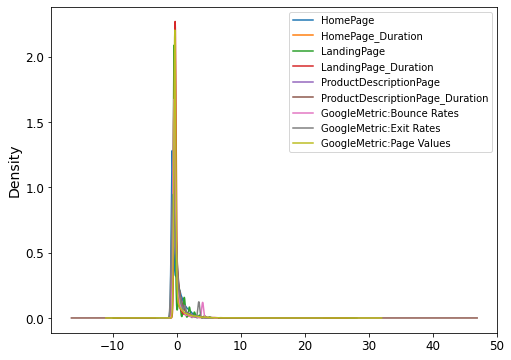

In [ ]:
ax=num_cols.plot.kde()

In [ ]:
#Baseline dummy classifier
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_train,y_train)

0.6087143471406048

In [ ]:
y_train.value_counts()[0]/y_train.value_counts().sum()

0.6087143471406048

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dummy_clf = RandomForestClassifier()
dummy_clf.fit(X_train, y_train)
prediction=dummy_clf.predict(X_test)
score=dummy_clf.score(X_train, y_train)
submission=pd.DataFrame(columns=['id','Made_Purchase'])
submission['id']=[i for i in range(len(prediction))]
submission['Made_Purchase']=prediction
submission.to_csv("submission.csv",index=False)

In [ ]:
score

0.796975777554823

In [ ]:
pd.read_csv("submission.csv")

,id,Made_Purchase
0,0,False
1,1,True
2,2,True
3,3,True
4,4,False
...,...,...
6594,6594,False
6595,6595,True
6596,6596,False
6597,6597,False


In [ ]:
y_train.head()

0    False
1    False
2    False
3    False
4    False
Name: Made_Purchase, dtype: bool

In [ ]:
y_train.value_counts()

False    8494
True     5460
Name: Made_Purchase, dtype: int64

<Axes: >

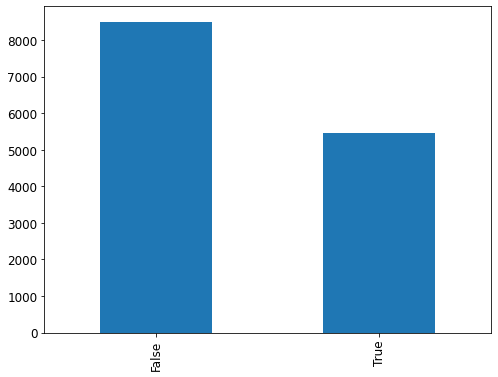

In [ ]:
y_train.value_counts().plot(kind='bar')

In [ ]:
from sklearn.linear_model import Perceptron
percep=Perceptron(max_iter=100,random_state=42)
percep.fit(X_train,y_train)
percep.score(X_train,y_train)

0.5068080837035975

In [ ]:
from sklearn.model_selection import cross_validate
from pprint import pprint
scores=cross_validate(percep,X_train,y_train, cv=5,scoring=['precision','recall','f1'],return_estimator=True)
pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=42),
               Perceptron(max_iter=100, random_state=42),
               Perceptron(max_iter=100, random_state=42),
               Perceptron(max_iter=100, random_state=42),
               Perceptron(max_iter=100, random_state=42)],
 'fit_time': array([0.03915191, 0.02582335, 0.04210997, 0.04750538, 0.03307343]),
 'score_time': array([0.0197804 , 0.01447964, 0.01416087, 0.01409149, 0.01848197]),
 'test_f1': array([0.49089906, 0.35991141, 0.28288908, 0.40946897, 0.45148193]),
 'test_precision': array([0.61719834, 0.45518207, 0.26661264, 0.31465093, 0.4055434 ]),
 'test_recall': array([0.40750916, 0.29761905, 0.30128205, 0.58608059, 0.50915751])}


In [ ]:
print('Test F1 score: ',scores['test_f1'].mean(),' +/- ',scores['test_f1'].std() )
print('Test precision score: ',scores['test_precision'].mean(),' +/- ',scores['test_precision'].std() )
print('Test recall score: ',scores['test_recall'].mean(),' +/- ',scores['test_recall'].std() )

Test F1 score:  0.39893009024968273  +/-  0.07255209121723985
Test precision score:  0.4118374766776225  +/-  0.12216949581669642
Test recall score:  0.42032967032967034  +/-  0.11380540329791766


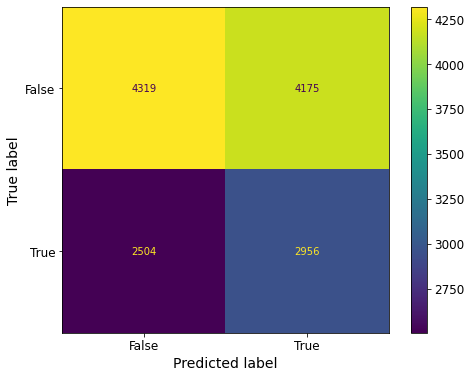

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
y_hat_train_0=cross_val_predict(percep,X_train,y_train,cv=10)
cm_display=ConfusionMatrixDisplay.from_predictions(y_train,y_hat_train_0)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_hat_train_0))

              precision    recall  f1-score   support

       False       0.63      0.51      0.56      8494
        True       0.41      0.54      0.47      5460

    accuracy                           0.52     13954
   macro avg       0.52      0.52      0.52     13954
weighted avg       0.55      0.52      0.53     13954



In [ ]:
#LogReg
from scipy.stats import loguniform
eta_grid=loguniform(1e-3,1e-1)
alpha_grid=loguniform(1e-7,1e-1)
penalty=['l1','l2']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
estimator=SGDClassifier(loss='log',penalty='l2',max_iter=100,warm_start=False,learning_rate='constant',eta0=0.01,alpha=0,random_state=42)
RCV=RandomizedSearchCV(estimator,param_distributions={'eta0':eta_grid,
'alpha':alpha_grid, 'penalty':penalty},cv=5,scoring='precision',n_iter=10,refit=True,random_state=42)
RCV.fit(X_train,y_train)
pprint(RCV.cv_results_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The

{'mean_fit_time': array([0.1923821 , 0.04397273, 0.05247226, 0.08139615, 0.04795389,
       0.04359236, 0.04196658, 0.07561636, 0.04674978, 0.07434726]),
 'mean_score_time': array([0.00735159, 0.00912099, 0.00850067, 0.00709991, 0.00876894,
       0.00673118, 0.00700564, 0.00707808, 0.00839958, 0.01475468]),
 'mean_test_score': array([0.25712905, 0.30136214, 0.24674908, 0.24042653, 0.3200875 ,
       0.37615701, 0.2378545 , 0.24660999, 0.23924215, 0.47272049]),
 'param_alpha': masked_array(data=[1.7670169402947946e-05, 0.004765911808680838,
                   8.629132190071855e-07, 1.0051981180656775e-05,
                   1.3289448722869185e-07, 0.04278743516759823,
                   1.2601639723276798e-06, 1.1025488264291651e-07,
                   0.00046894009635376903, 0.06958780103230357],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object),
 'param_eta0': masked_array(data

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



In [ ]:
RCV.best_params_

{'alpha': 0.06958780103230357, 'eta0': 0.002921074818565714, 'penalty': 'l2'}

In [ ]:
log_reg=RCV.best_estimator_

In [ ]:
log_reg.score(X_train,y_train)

0.6443313745162678

In [ ]:
#for visualisation
train_data_processed=pd.concat([X_train.reset_index(drop=True),y_train.reset_index(drop=True).astype(str)],axis=1)

In [ ]:
from sklearn.svm import LinearSVC
linearsvc=LinearSVC(C=1)
linearsvc.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=1)

In [ ]:
linearsvc.score(X_train,y_train)

0.6509244661029095

In [ ]:
from sklearn.model_selection import cross_val_score
svc_acc=cross_val_score(linearsvc,X_train,y_train,cv=10)
svc_acc.mean()

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarni

0.5928603999137321

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV
# svc=SVC()
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# param_grid={'C':np.arange(1,5,0.5).tolist()}
# gscv=GridSearchCV(svc,param_grid=param_grid,cv=cv)
# gscv.fit(X_train,y_train)

In [ ]:
# gscv.best_params_

In [ ]:
# estimator=gscv.best_estimator_
# estimator.fit(X_train,y_train)
# # estimator.score(X_train,y_train)

In [ ]:
%matplotlib inline
import matplotlib as mpl
from  matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure',figsize=(8,6))


import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
pca=PCA(n_components=2)
x_train_pca_2d=pca.fit_transform(X_train)

/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



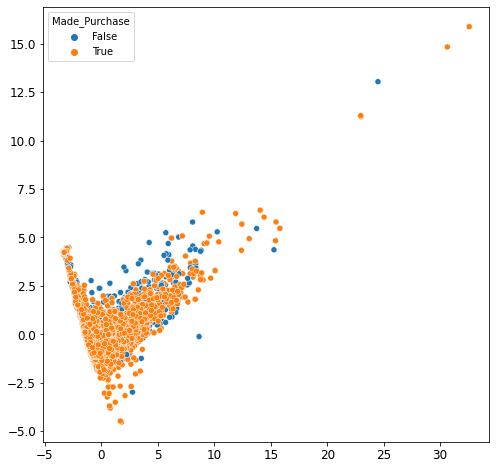

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = x_train_pca_2d[:,0], y=x_train_pca_2d[:,1],hue=y_train,cmap='viridis')
plt.show()

In [ ]:
pca=PCA(n_components=3)
x_train_pca_3d=pca.fit_transform(X_train)
import plotly.express as px
fig = px.scatter_3d(x=x_train_pca_3d[:,0],
                    y=x_train_pca_3d[:,1],
                    z=x_train_pca_3d[:,2],
                    color=y_train,
                    opacity=0.5)
fig.show()

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_knn_3d=make_pipeline(PCA(n_components=4),KNeighborsClassifier(n_neighbors=5))
pipe_knn_3d.fit(X_train,y_train)
pipe_knn_3d.score(X_train,y_train)

0.6954994983517271

In [ ]:
param_grid={'pca__n_components':np.arange(1,11).tolist(),'kneighborsclassifier__n_neighbors':np.arange(1,10).tolist()}
knn_gcv=GridSearchCV(pipe_knn_3d,param_grid=param_grid)
knn_gcv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=4)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
knn_gcv.best_params_

{'kneighborsclassifier__n_neighbors': 8, 'pca__n_components': 8}

In [ ]:
knn_gcv_estimator=knn_gcv.best_estimator_
knn_gcv_estimator.fit(X_train,y_train)
knn_gcv_estimator.score(X_train,y_train)

0.675218575318905

In [ ]:
#preprocessor = ColumnTransformer(
#    transformers=[
#        ("num", numeric_transformer, numeric_features),
#        ("cat", categorical_transformer, categorical_features),
#    ]
#)

#numeric_transformer = Pipeline(
#    steps=[("imputer", SimpleImputer(missing_values = 0, strategy="constant", fill_value = 0.107996)), ("scaler", StandardScaler())]
#)

#categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [ ]:
X_train_copy=X_train.copy()

In [ ]:
X_train.shape

(13954, 32)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.decomposition import PCA
skb=SelectKBest(mutual_info_regression,k=20)
pca=PCA(n_components=15)
X_train=pca.fit_transform(X_train_copy,y_train)

In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
clf=BaggingClassifier(random_state=42)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.791529310591945

In [ ]:
acc=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
acc.mean()*100

41.34851752575203

In [ ]:
tuned_parameters = [{'n_estimators': [10, 50, 100, 500],
                    'max_samples': [0.05, 0.1, 0.2, 0.5]
                     }]

clf_CV = GridSearchCV(
        BaggingClassifier(random_state = 0), tuned_parameters
    )
clf_CV.fit(X_train, y_train)
clf_CV.best_params_

KeyboardInterrupt: ignored

In [ ]:
bag_clf=clf_CV.best_estimator_

In [ ]:
acc=cross_val_score(estimator=bag_clf,X=X_train,y=y_train,cv=10)
acc.mean()*100

In [ ]:
clf_RF=RandomForestClassifier(random_state=42)
clf_RF.fit(X_train, y_train)
clf_RF.score(X_train, y_train)

In [ ]:
tuned_parameters = [{'n_estimators': [50,100,250, 500],
                    'max_depth' : [6,8,10,None]
                     }]

clf_RFC_CV = GridSearchCV(RandomForestClassifier(random_state = 42), tuned_parameters)
clf_RFC_CV.fit(X_train, y_train)

In [ ]:
clf_RFC_CV.best_params_

In [ ]:
clf_RFC=clf_RFC_CV.best_estimator_

In [ ]:
clf_RFC.fit(X_train,y_train)
clf_RFC.score(X_train,y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_grad=GradientBoostingClassifier(random_state=42)
clf_grad.fit(X_train,y_train)
clf_grad.score(X_train,y_train)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ABC=AdaBoostClassifier(random_state=42)
clf_ABC.fit(X_train,y_train)
clf_ABC.score(X_train,y_train)

In [ ]:
tuned_parameters = [{
    'n_estimators': [50,150],
    'learning_rate': [0.1,0.7]
}]


clf_ABC_CV = GridSearchCV(
        AdaBoostClassifier(random_state = 0), tuned_parameters
    )
clf_ABC_CV.fit(X_train, y_train)

In [ ]:
clf_ABC_CV.score(X_train, y_train)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(hidden_layer_sizes=(128,),random_state=42)
mlpc.fit(X_train,y_train)
mlpc.score(X_train,y_train)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(),cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42))

In [ ]:
cv_score